# Using the API of candels-blender 

In [1]:
import pathlib
import numpy as np

from blender import Blender

In [2]:
relative_datapath = '../data'

cwd = pathlib.Path.cwd()
datapath = cwd / relative_datapath

instamps = datapath / 'candels_img.npy'
insegmaps = datapath / 'candels_seg.npy'
incat = datapath / 'candels_cat.csv'

### 1) Initialise the Blender with the input data

In [3]:
blender = Blender(instamps, insegmaps, incat,
                  magdiff=2, raddiff=4, seed=42)

### 2) Perform some cuts

In [4]:
blender.make_cut(blender.cat.mag < 23)
blender.make_cut(blender.cat.galtype != 'irr')

Print the number of individual galaxies left after the cuts

In [5]:
print(blender.n_gal)

1499


### 3) Look at a few CANDELS stamps

Start by looking at the galaxy catalog

In [6]:
blender.cat.head(10)

,ID,RA,DEC,FIELD,mag,mag_err,radius,z,galtype,segval
0,81,150.187347,2.299129,b'COSMOS ',21.319714,21.319714,7.509261,0.51,disk,444
1,140,150.075810,2.299438,b'COSMOS ',22.528311,22.528311,9.707145,0.71,disk,480
2,965,150.181844,2.305283,b'COSMOS ',22.187510,22.187510,7.470621,0.48,disk,602
3,1349,150.129858,2.308877,b'COSMOS ',21.897583,21.897583,8.012516,0.84,disk,701
4,1543,150.125006,2.310288,b'COSMOS ',21.516315,21.516315,10.509004,0.86,disk,719
5,1641,150.057499,2.312305,b'COSMOS ',21.923916,21.923916,7.331826,0.87,disk,780
6,1862,150.072160,2.314135,b'COSMOS ',22.640232,22.640232,6.259631,0.70,disk,818
7,1958,150.167750,2.314084,b'COSMOS ',21.588900,21.588900,22.141111,0.87,disk,793
8,2305,150.186851,2.317761,b'COSMOS ',22.483994,22.483994,6.662786,0.95,disk,945
9,3519,150.087198,2.328732,b'COSMOS ',22.740059,22.740059,11.687378,0.61,disk,1164


Select two galaxies

In [7]:
gal1 = 348
gal2 = 703

Display each galaxy and their segmentation map, as well as the segmentation after the neighbours have been masked out.

In [8]:
blender.plot_galaxy(gal1)

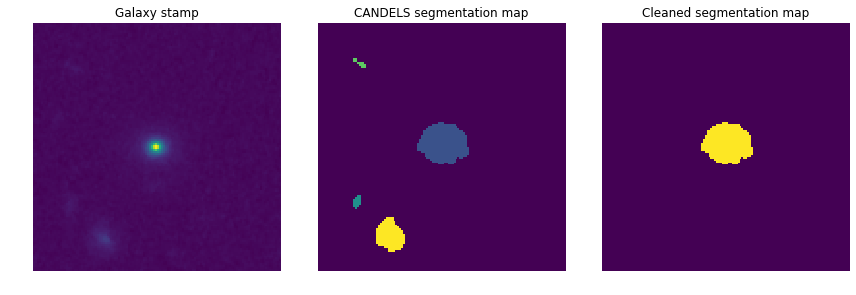

In [12]:
blender.plot_galaxy(gal2)

### 4) Create a blend with the two galaxies

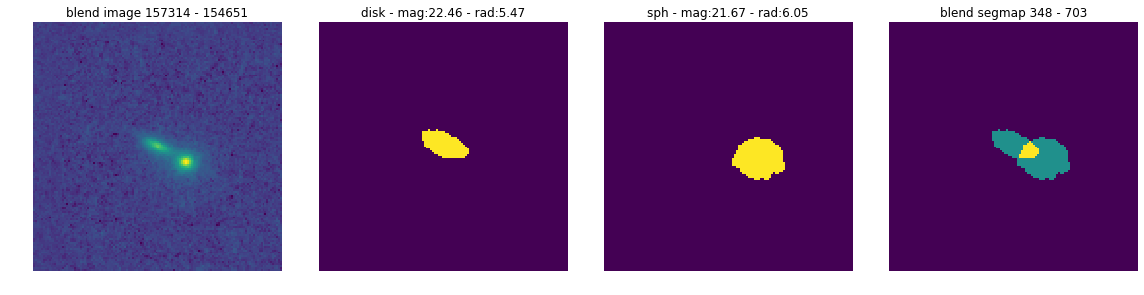

In [14]:
blender.plot_blend(gal1, gal2)

First pic is the resulting blend image, then the segmap of the central galaxy, followed by the segmap of the shifted companion, and finally the segmap of the overlap.

Note that every call to `blender.blend()` is currently not reproducible since it triggers a random shift. This is why each new call to `plot_blend()` with the same galaxies will show a slightly different result.

If the neighbours had not been masked, one could have this:

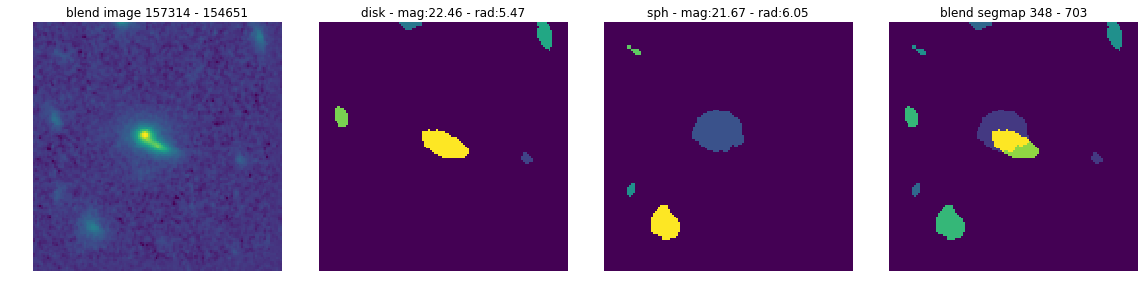

In [17]:
blender.plot_blend(gal1, gal2, masked=False)